<h2 style="color:blue" align="left"> Task 3: Exploratory Data Analysis on dataset 'SampleSuperstore' </h2>


### EDA (Exploratory Data Analysis)

## Objective

- Perform "Exploratory Data Analysis" on the dataset "SampleSuperstore".


- As a business manager, try to find out the weak areas where you can work to make more profit.


- What all business problems you can derive by exploring the data?

## Data Science Business Analytics Internship
### GRIP @ The Sparks Foundaton
#### BY: Swaraj Gadgul

---------------

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Load data </h2>

In [2]:
store = pd.read_csv("SampleSuperstore.csv")

In [3]:
# Import first 5 rows
store.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
# Import last 5 rows
store.tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [5]:
# checking dimension (num of rows and columns) of dataset
print("Superstore data shape (Rows, Columns):", store.shape)

Superstore data shape (Rows, Columns): (9994, 13)


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
store.dtypes.value_counts()

object     8
float64    3
int64      2
dtype: int64

In [8]:
# Finding all the column names inside the dataset
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
store.duplicated().sum()

17

In [10]:
store.drop_duplicates(inplace=True)

In [33]:
store.shape

(9977, 13)

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

### a) Find Unwanted Columns

- There is no unwanted column present in given dataset to remove.

     EX: ID

### b) Missing Values

In [11]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
# Finding Total number of null values in a dataset
print("total number of null values = ", store.isnull().sum().sum())

total number of null values =  0


### c) Correlation Matrix

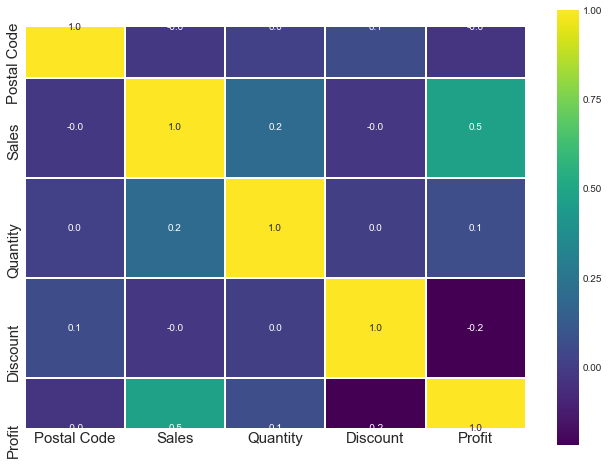

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(store.corr(), annot=True, cmap='viridis', fmt='.1f', linewidth=1, square=True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### d) Find Outliers

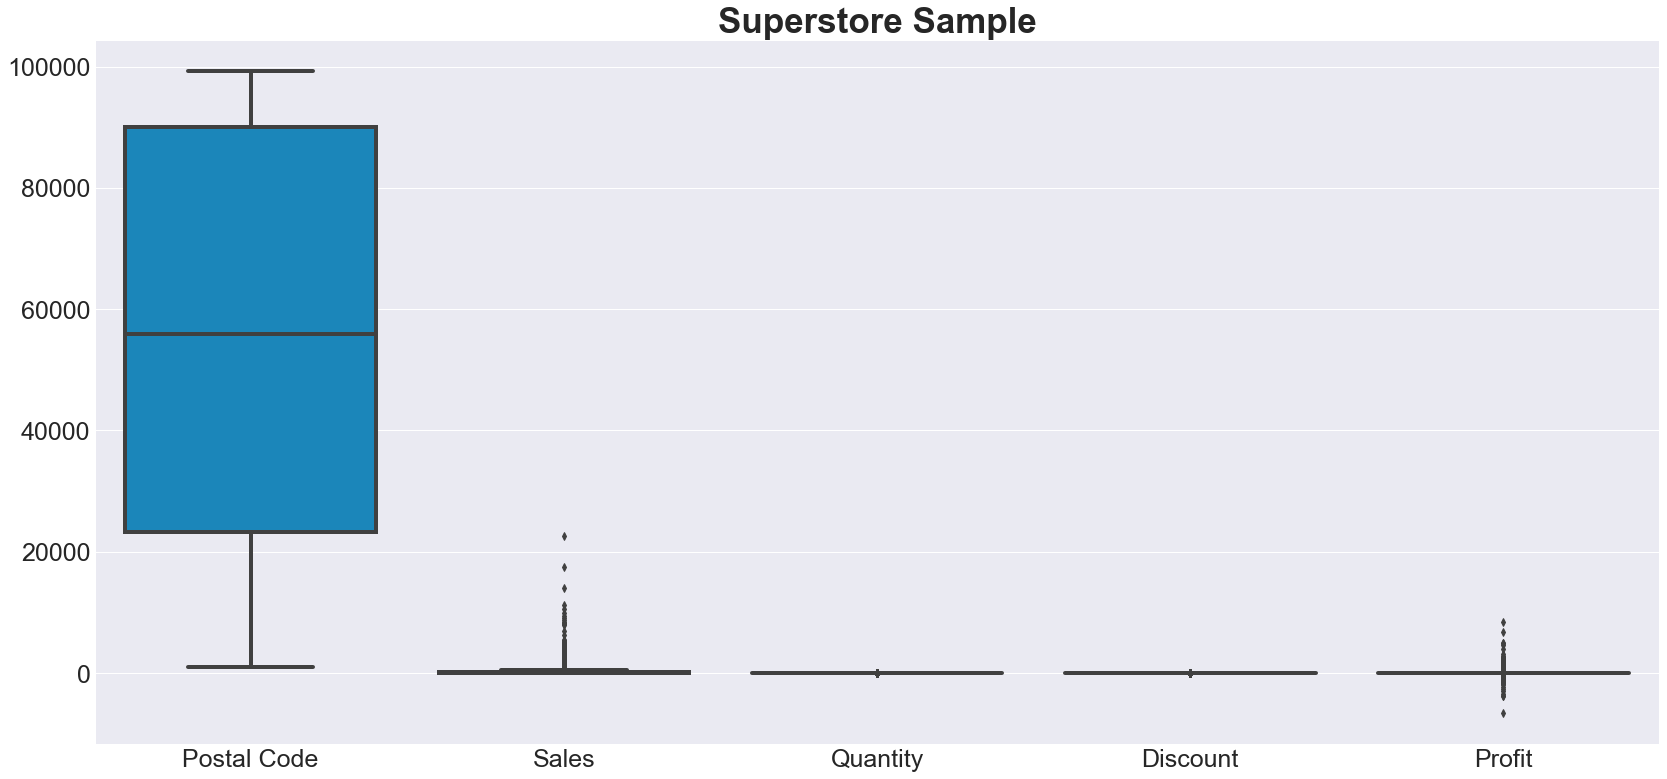

In [14]:
plt.figure(figsize=(25,13))
sns.boxplot(data=store)

plt.title("Superstore Sample", fontsize=35, fontweight='bold')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

### e. Grouping

In [15]:
store[['Sales','Quantity','Profit']].groupby(['Profit'],as_index=True).sum().sort_values(by='Quantity',ascending=True)

Sales  Quantity
Profit                       
 43.7842    150.980         1
-0.8886      35.544         1
-0.8558       1.167         1
 8.5914      19.980         1
-0.8120      12.992         1
...             ...       ...
 6.2208     544.320        84
 5.4432     466.560        90
 9.3312     699.840       108
 15.5520    842.400       130
 0.0000   27686.847       255

[7287 rows x 2 columns]

In [16]:
store[['Sales', 'Discount']].groupby(['Sales'], as_index=True).sum().sort_values(by='Discount', ascending=False)

Discount
Sales            
15.552        7.4
10.368        7.0
20.736        3.8
2.946         3.6
3.168         3.4
...           ...
101.700       0.0
101.880       0.0
101.940       0.0
101.960       0.0
83.560        0.0

[5825 rows x 1 columns]

In [17]:
store.groupby(["Category", "Sub-Category"], as_index=False)["Quantity"].count()

Category Sub-Category  Quantity
0         Furniture    Bookcases       228
1         Furniture       Chairs       615
2         Furniture  Furnishings       956
3         Furniture       Tables       319
4   Office Supplies   Appliances       466
5   Office Supplies          Art       795
6   Office Supplies      Binders      1522
7   Office Supplies    Envelopes       254
8   Office Supplies    Fasteners       217
9   Office Supplies       Labels       363
10  Office Supplies        Paper      1359
11  Office Supplies      Storage       846
12  Office Supplies     Supplies       190
13       Technology  Accessories       775
14       Technology      Copiers        68
15       Technology     Machines       115
16       Technology       Phones       889

In [18]:
store.groupby("Category", sort=False)["Sub-Category"].count()

Category
Furniture          2118
Office Supplies    6012
Technology         1847
Name: Sub-Category, dtype: int64

<h2 style="color:blue" align="left"> 4. Data Preprocessing </h2>

### Ship Mode

In [19]:
store['Ship Mode'].nunique()

4

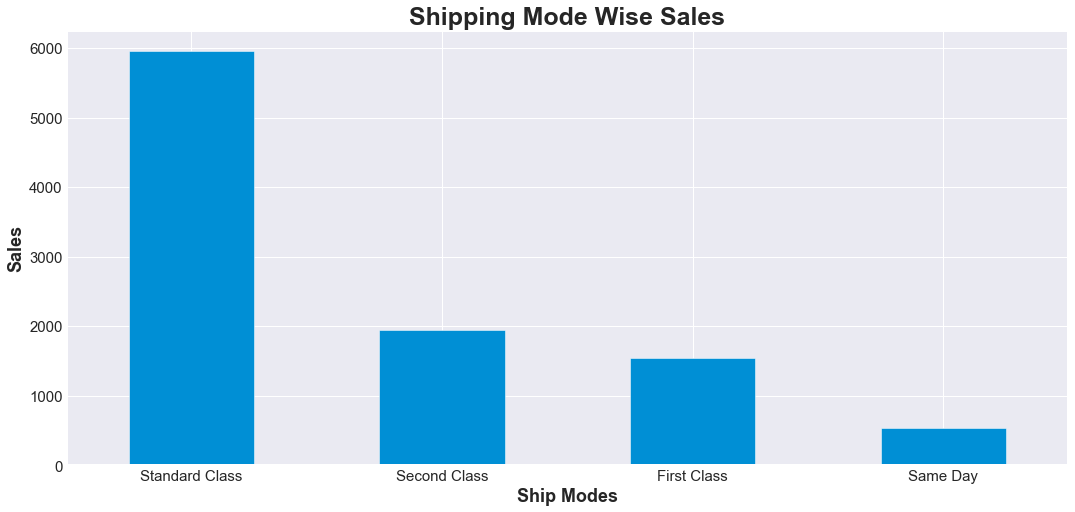

In [20]:
# Shipping Mode wise sales
plt.figure(figsize=(16,8))
store['Ship Mode'].value_counts().plot.bar()

plt.title('Shipping Mode Wise Sales', fontsize=25, fontweight='bold')

plt.ylabel('Sales', fontsize=18, fontweight='bold')
plt.xlabel('Ship Modes', fontsize=18, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

# Standard Class shipping method is the highest which is 12 times higher than same day. 
# if they decrease the price of the other shipping method that could increase the customer satisfaction

### Segment

In [21]:
store['Segment'].nunique()

3

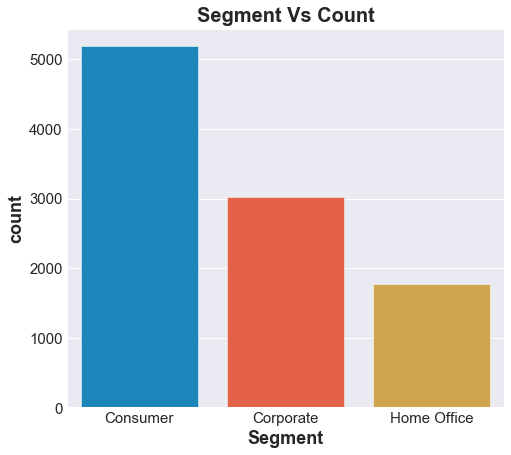

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


In [54]:
plt.figure(figsize=(7,7))
sns.countplot(store['Segment'])

plt.xlabel('Segment', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Segment Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Segment'].value_counts())

- Consumers are the biggest buyers then corportes and then Home office
- Company should try to bring more schemes for the consumers
- to improve the corporate sales, they can bring sorporate level schemes

### Region

In [23]:
store['Region'].nunique()

4

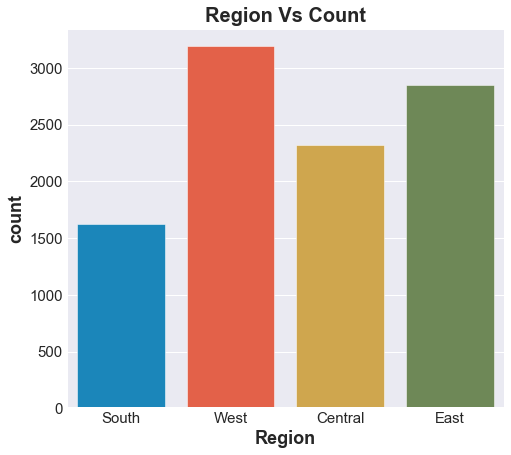

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


In [55]:
plt.figure(figsize=(7,7))
sns.countplot(store['Region'])

plt.xlabel('Region', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Region Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Region'].value_counts())

### Category

In [25]:
store['Category'].nunique()

3

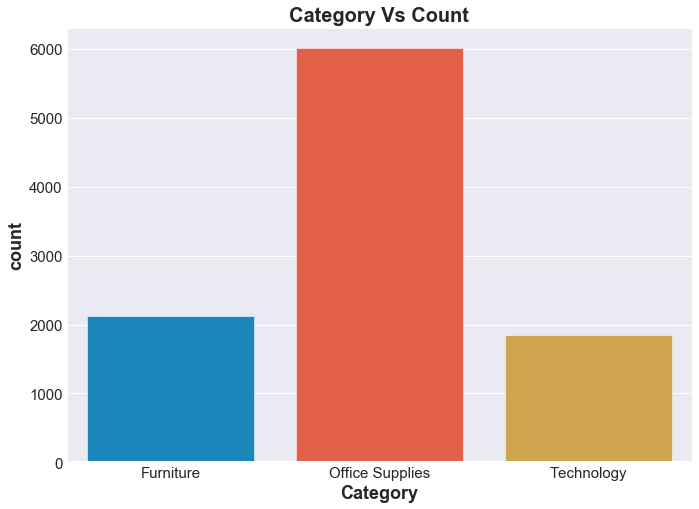

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


In [26]:
plt.figure(figsize=(10,8))
sns.countplot(store['Category'])

plt.xlabel('Category', fontsize=18, fontweight='bold')
plt.ylabel('count', fontsize=18, fontweight='bold')

plt.title('Category Vs Count', fontsize=20, fontweight='bold')

plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

plt.show()

print(store['Category'].value_counts())

### Sub-Category

In [27]:
store['Sub-Category'].nunique()

17

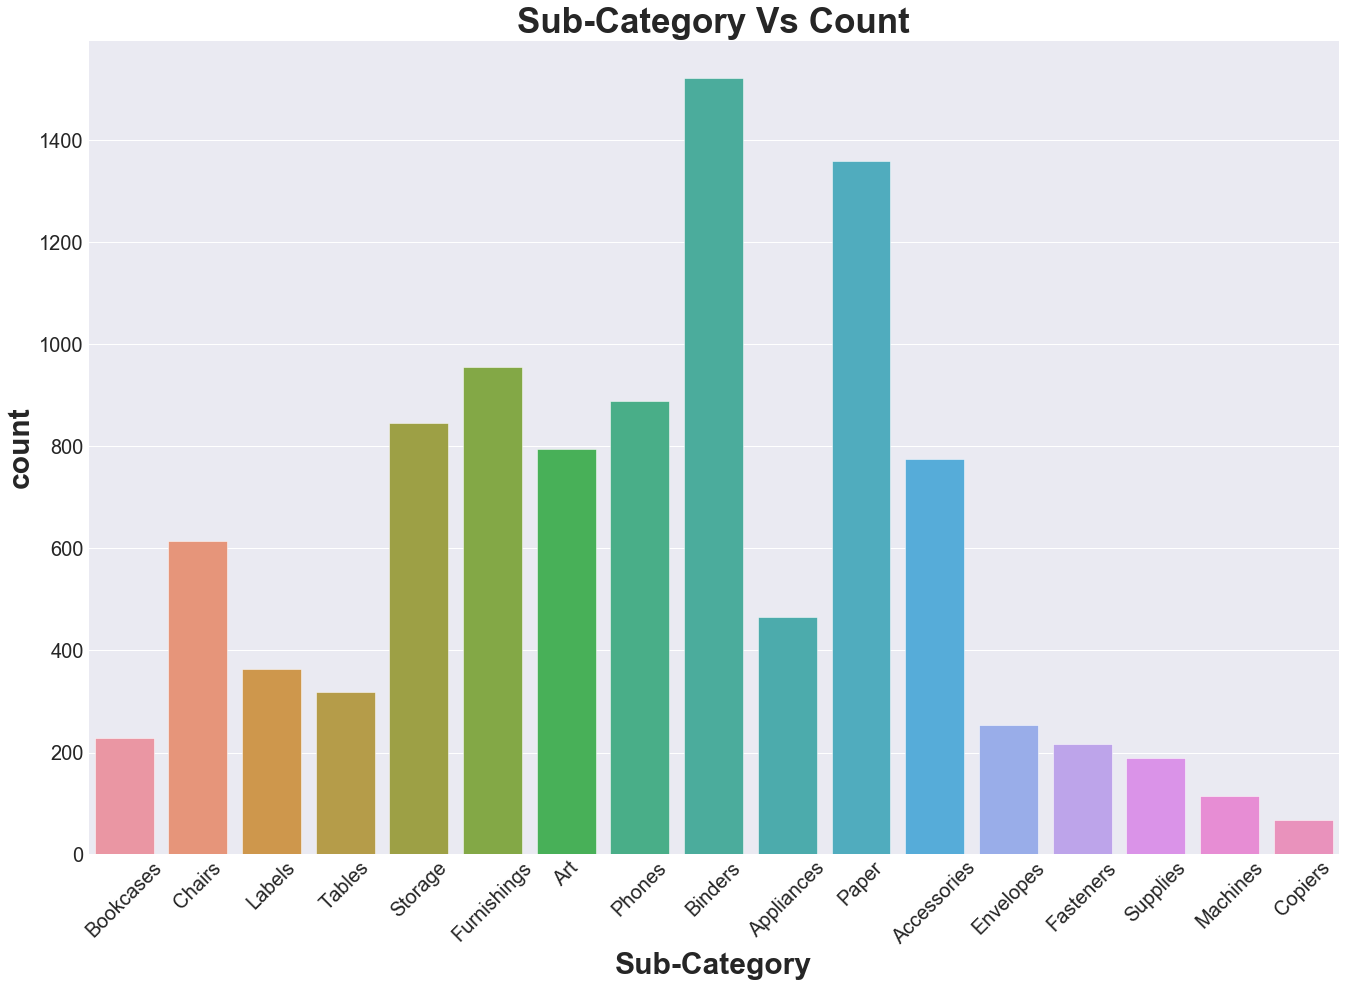

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


In [28]:
plt.figure(figsize=(20,15))
sns.countplot(store['Sub-Category'])

plt.xlabel('Sub-Category', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('Sub-Category Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['Sub-Category'].value_counts())

### Country

In [29]:
store['Country'].nunique()

1

### City

In [30]:
store['City'].nunique()

531

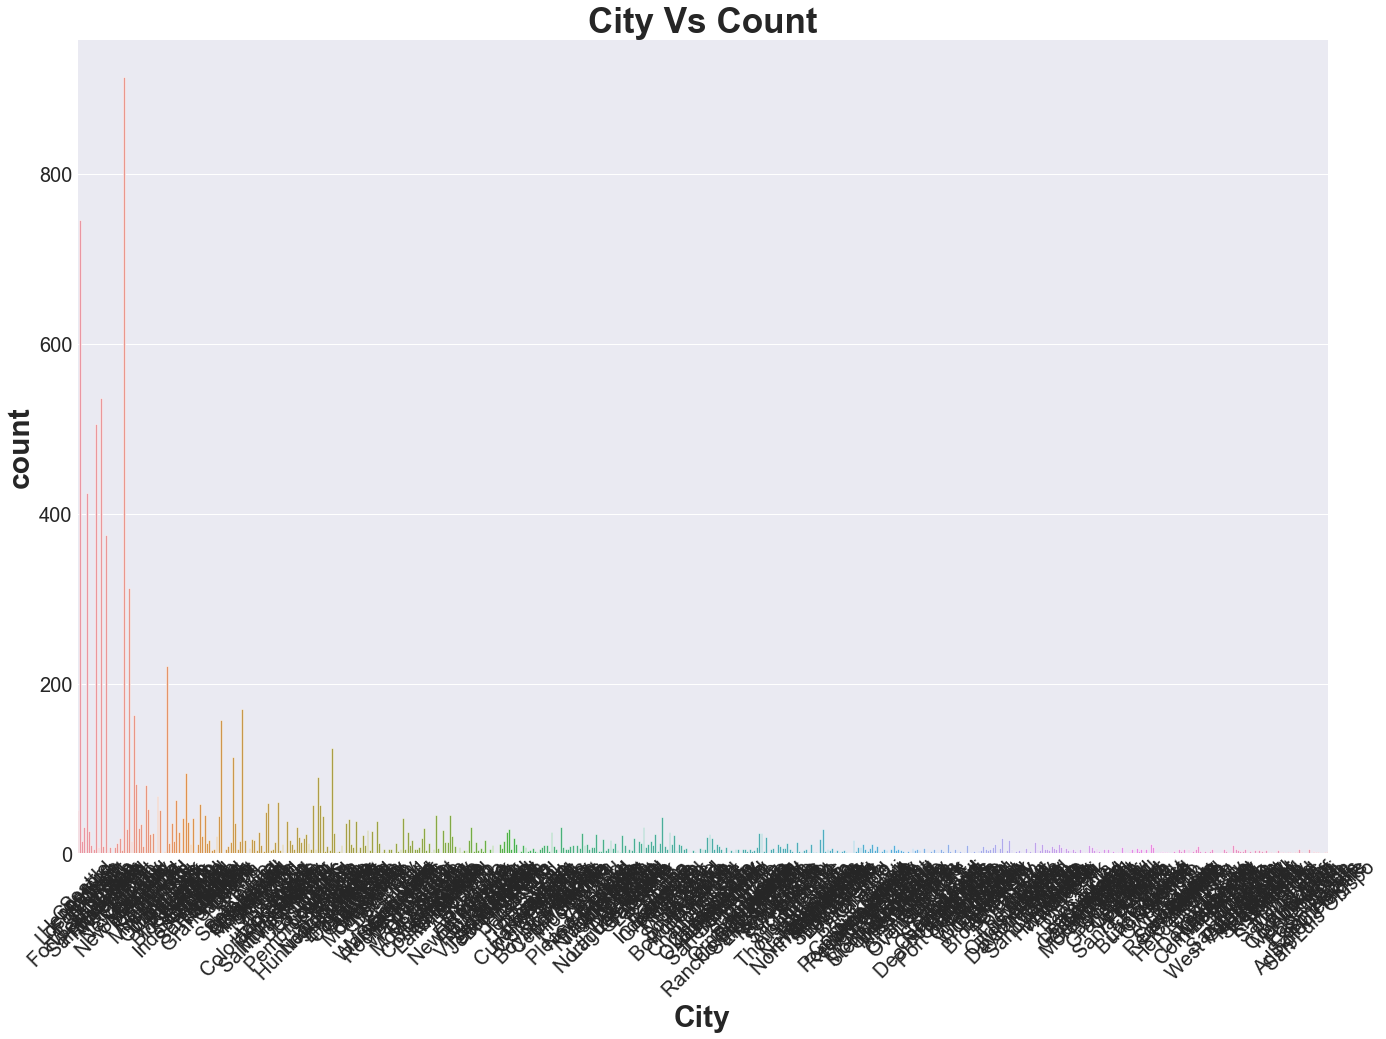

New York City     914
Los Angeles       746
Philadelphia      536
San Francisco     506
Seattle           424
                 ... 
Citrus Heights      1
La Quinta           1
Normal              1
Margate             1
Missouri City       1
Name: City, Length: 531, dtype: int64


In [31]:
plt.figure(figsize=(20,15))
sns.countplot(store['City'])

plt.xlabel('City', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('City Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['City'].value_counts())

### State

In [34]:
store['State'].nunique()

49

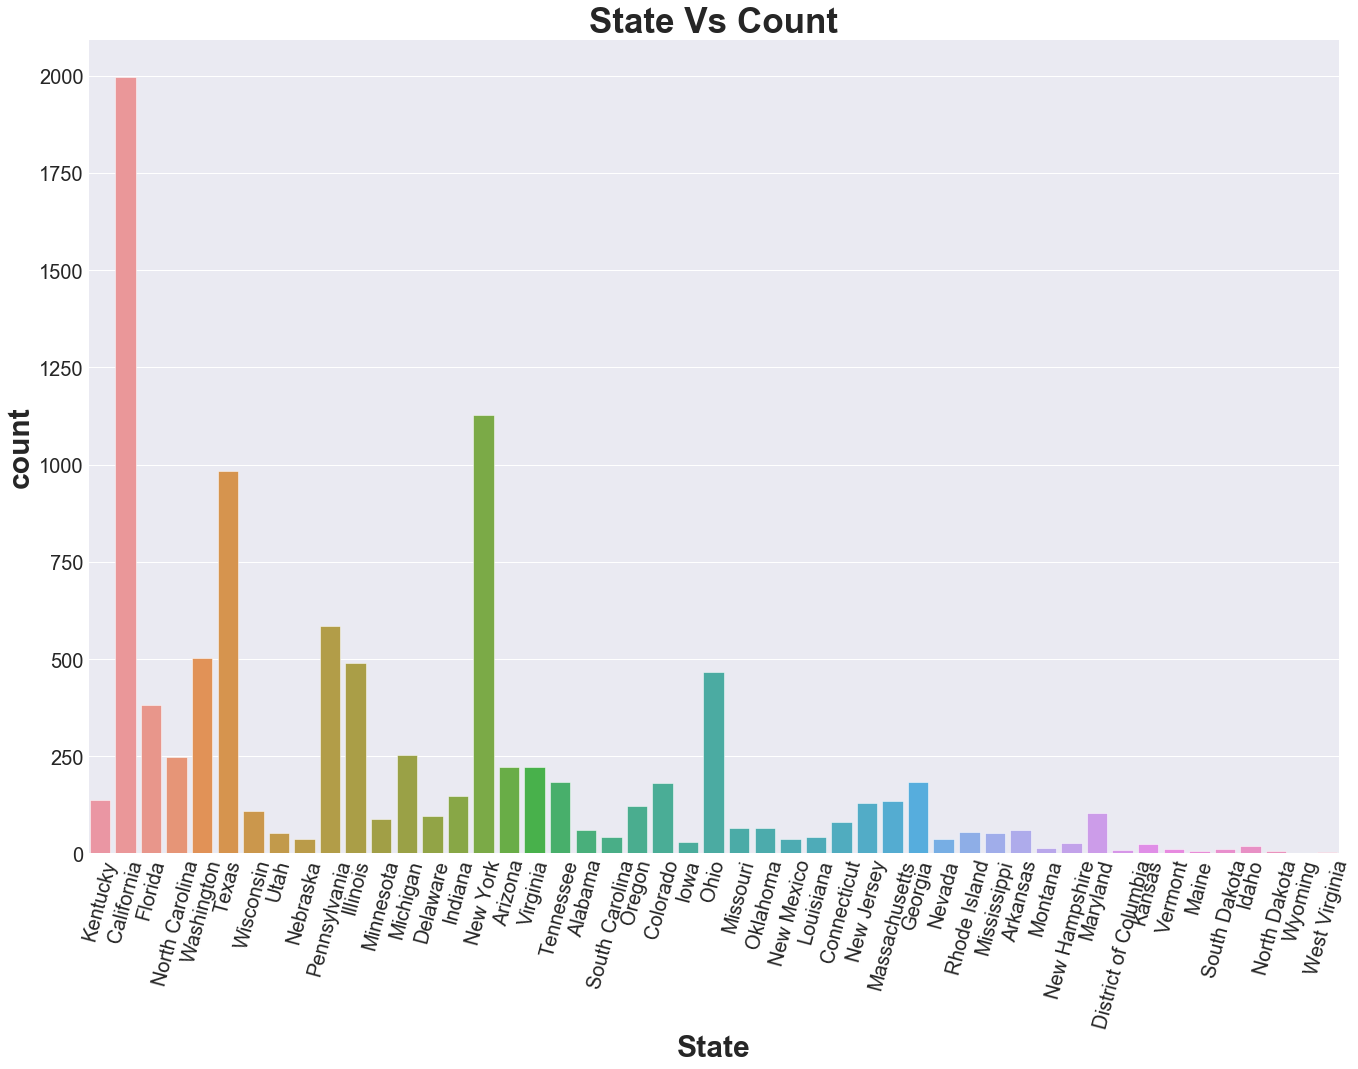

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [35]:
plt.figure(figsize=(20,15))
sns.countplot(store['State'])

plt.xlabel('State', fontsize=30, fontweight='bold')
plt.ylabel('count', fontsize=30, fontweight='bold')

plt.title('State Vs Count', fontsize=35, fontweight='bold')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

print(store['State'].value_counts())

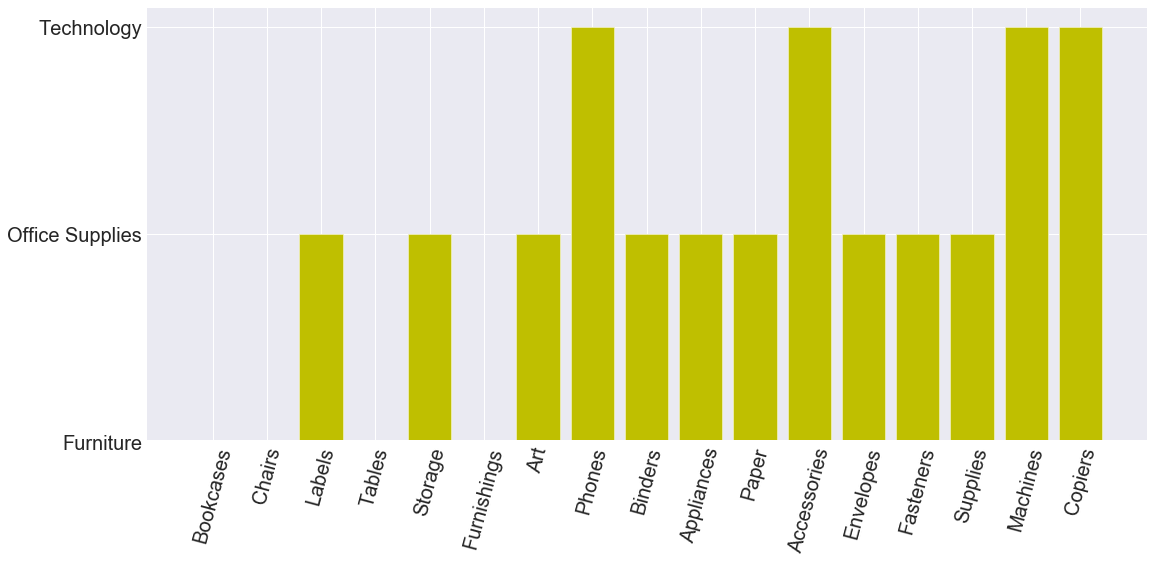

In [36]:
# Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=store, color='y')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

- From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

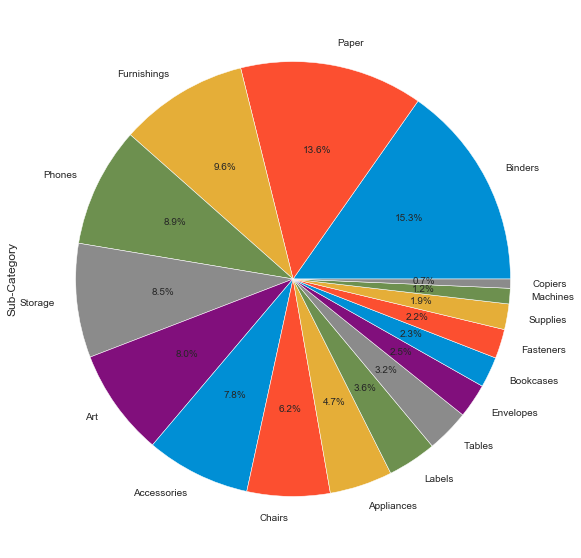

In [37]:
plt.figure(figsize=(12,10))
store['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

- The store has wide variety of Office Supplies especially in Binders and Paper department.

<Figure size 864x720 with 0 Axes>

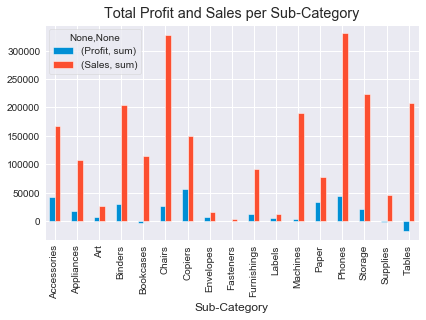

In [38]:
plt.figure(figsize=(12,10))
store.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')

plt.show()

- Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

- Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

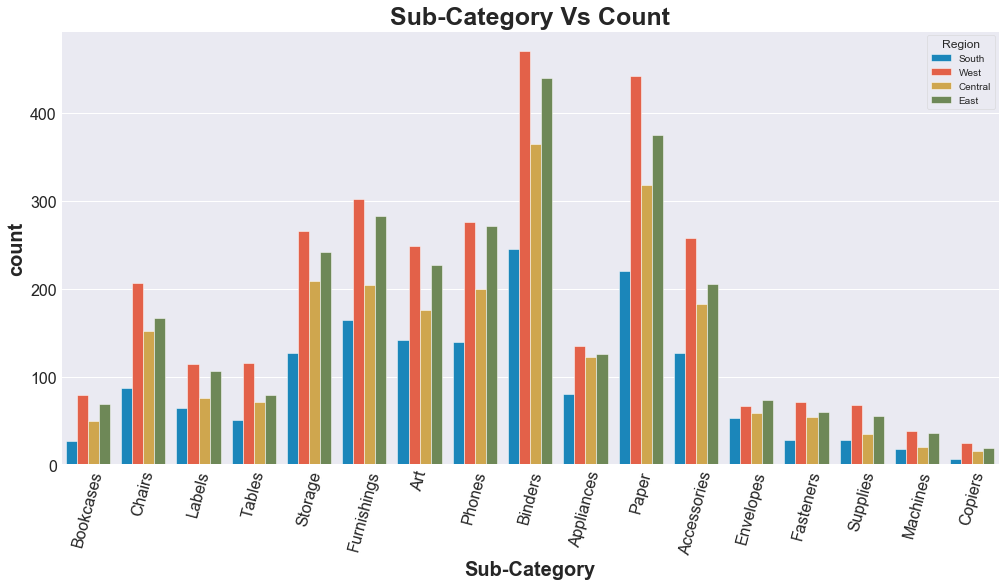

In [39]:
# Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=store)

plt.xlabel('Sub-Category', fontsize=20, fontweight='bold')
plt.ylabel('count', fontsize=20, fontweight='bold')

plt.title('Sub-Category Vs Count', fontsize=25, fontweight='bold')

plt.xticks(rotation=75, fontsize=16)
plt.yticks(fontsize=16)

plt.show()

- People residing in Western part of US tend to order more from superstore.

<Figure size 1296x864 with 0 Axes>

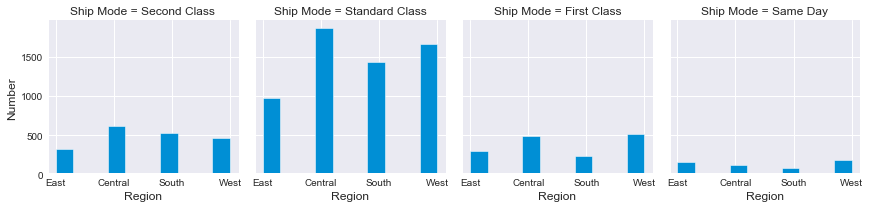

In [40]:
# Let's try to visualize the 'Region' column from the Shipmode column dataset standpoints.
plt.figure(figsize=(18,12))
region_hist = sns.FacetGrid(store, col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Number')
plt.show()

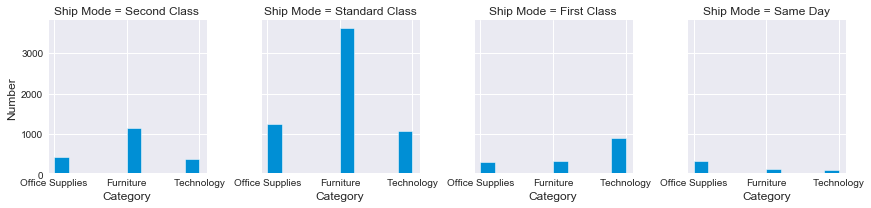

In [41]:
# Let's try to visualize the 'Category' column from the Shipmode column dataset standpoints.

category_hist = sns.FacetGrid(store, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')
category_hist.set_ylabels('Number')

In [42]:
fig = px.sunburst(store, path=['Country','Category','Sub-Category'],
                 values='Sales', color='Category',
                 hover_data =['Sales','Quantity','Profit'])
fig.update_layout(height=1000, title_text='Product Categories & Sub-Categories')
fig.show()

### Above graphs indicates

- Share of each category & sub-category in Sales
- Which sub-category belongs to which category
- Share of sub-category for each category(click on any category to get detailed view of each sub-category)

In [43]:
temp = store[['State','City','Sales']].groupby(['State','City'])['Sales'].sum().reset_index()
fig = px.treemap(temp, path=['State','City'], values='Sales')
fig.update_layout(height=1000, title='City-wise Sales',)
                 # color_discrete_sequence = px.colors.qualitative.Plotly)
fig.data[0].textinfo = 'label+text+value'
fig.show()

### Above graph indicates-

- Which city and state has how much sales
- Size of a tile indicates corresponding sales

In [44]:
d = []
for i in store['Sub-Category'].unique():
    sales = round(store[store['Sub-Category']==i]['Sales'].sum(),2)
    profit = round(store[store['Sub-Category']==i]['Profit'].sum(),2)
    d.append([i,sales,profit])
temp = pd.DataFrame(d,columns=['Sub-Category','Sales','Profit'])
temp = temp.sort_values('Sales',ascending=True)

fig = go.Figure(data=[go.Bar(name='Sales',x=temp['Sales'],y=temp['Sub-Category'],orientation='h',marker_color = 'green'),
                      go.Bar(name='Profit',x=temp['Profit'],y=temp['Sub-Category'],orientation='h',marker_color = 'navy')])
fig.update_layout(template='simple_white',title='Sales & Profit of each Sub-Category',height=700) #barmode='stack'
fig.show()

### a. Boxplot

Text(0.5, 1.0, 'Region wise Sales')

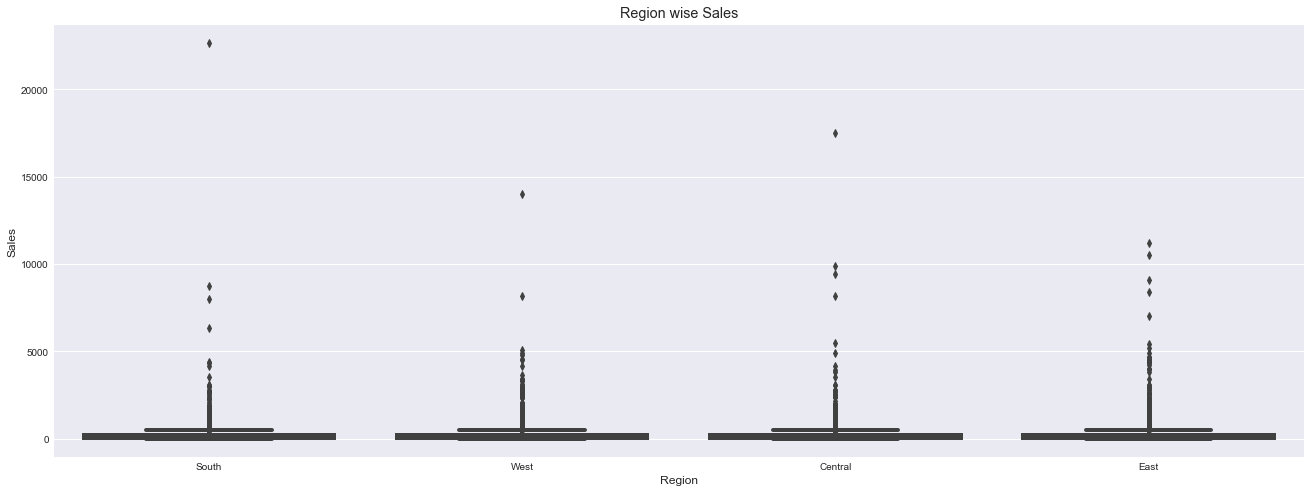

In [48]:
plt.figure(figsize=(20,8))
sns.boxplot("Region", "Sales", data=store)
plt.title('Region wise Sales')

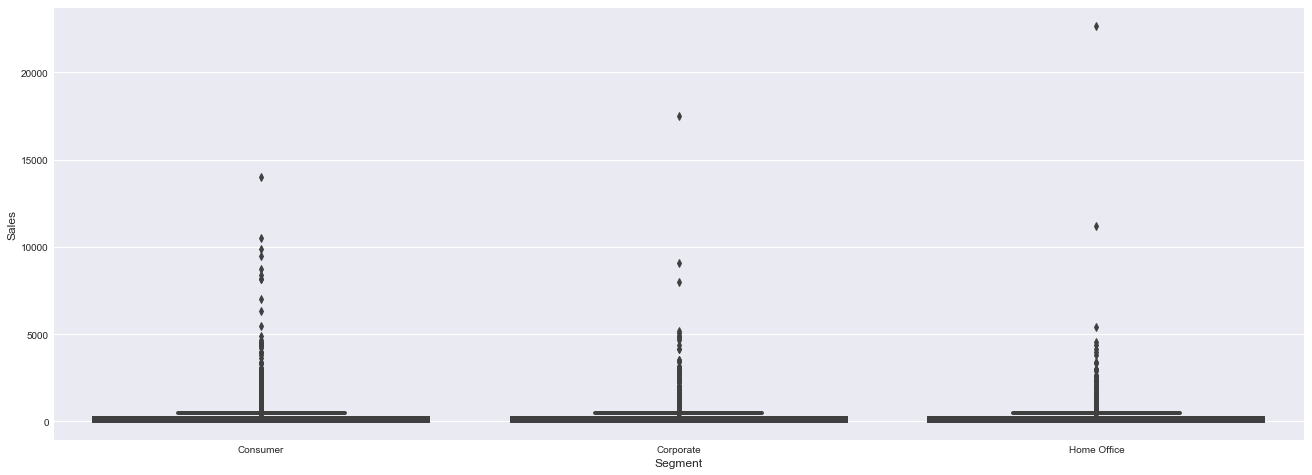

In [49]:
plt.figure(figsize=(20,8))
sns.boxplot('Segment', 'Sales', data=store)

Text(0.5, 1.0, 'Category Wise Sales')

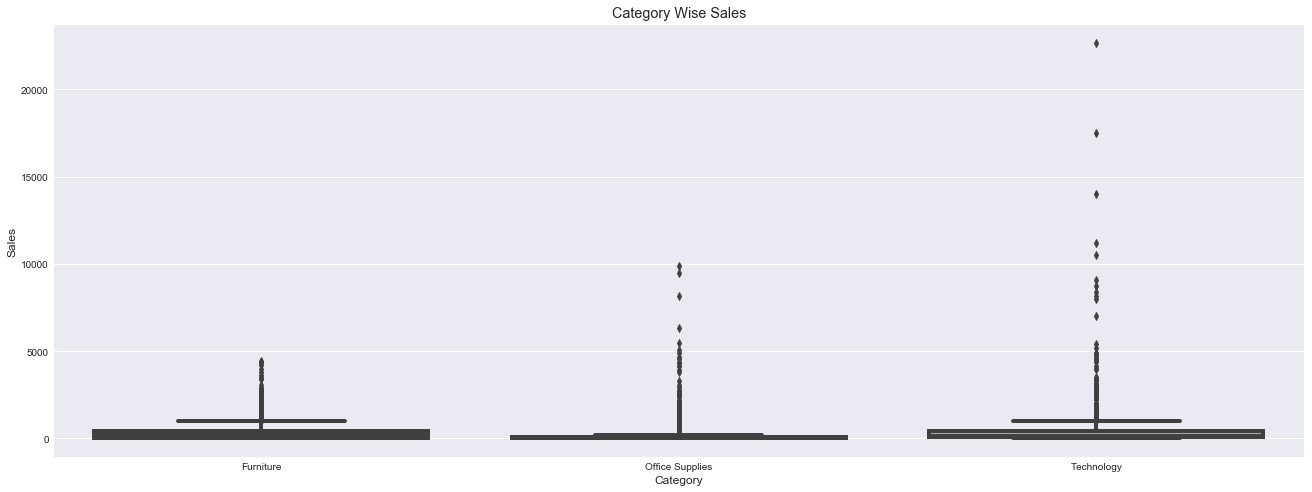

In [50]:
plt.figure(figsize=(20,8))
sns.boxplot("Category","Sales",data= store)
plt.title('Category Wise Sales')

Text(0.5, 1.0, 'Sales of sub category products')

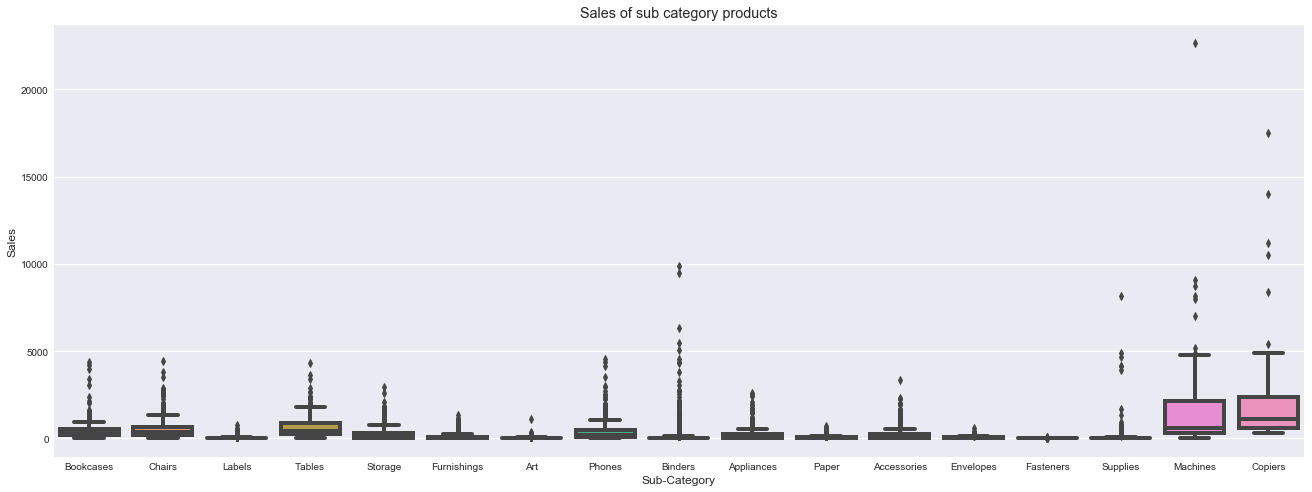

In [51]:
plt.figure(figsize=(20,8))
sns.boxplot("Sub-Category","Sales",data= store)
plt.title('Sales of sub category products')

Text(0.5, 1.0, 'Country Wise Sales')

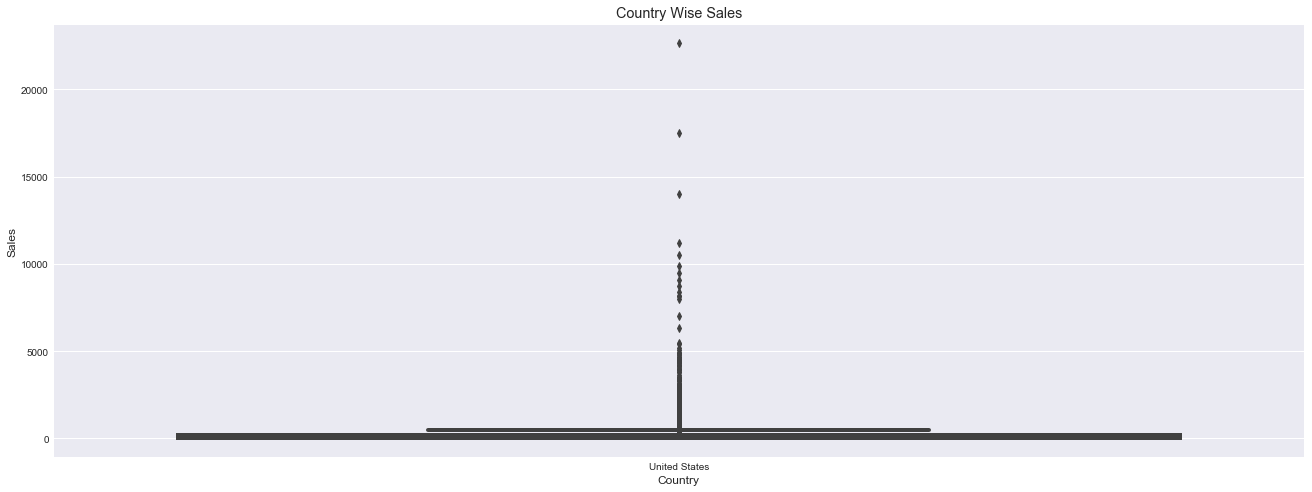

In [52]:
plt.figure(figsize=(20,8))
sns.boxplot("Country","Sales",data= store)
plt.title('Country Wise Sales')

### b. Histogram – Distribution of Target Variable

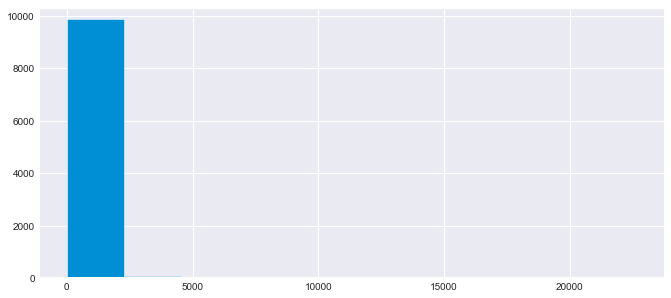

In [53]:
plt.figure(figsize=(10,5))
plt.hist(x='Sales',data=store,bins=10)
plt.show()

### C. Distribution Plot – Target Variable

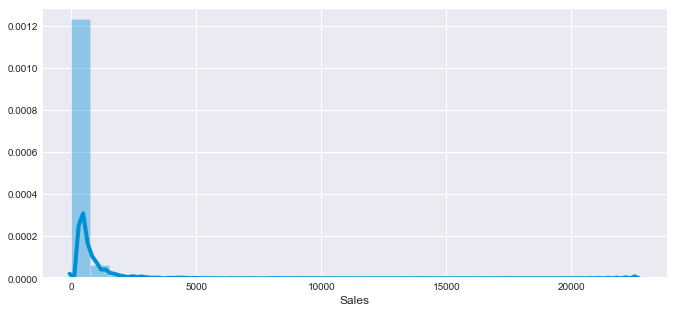

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(store['Sales'],bins=30)

### h. Regression Plot

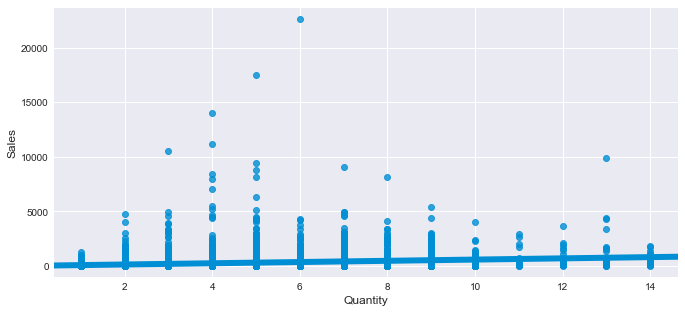

In [57]:
plt.figure(figsize=(10,5))
sns.regplot('Quantity','Sales',data=store)

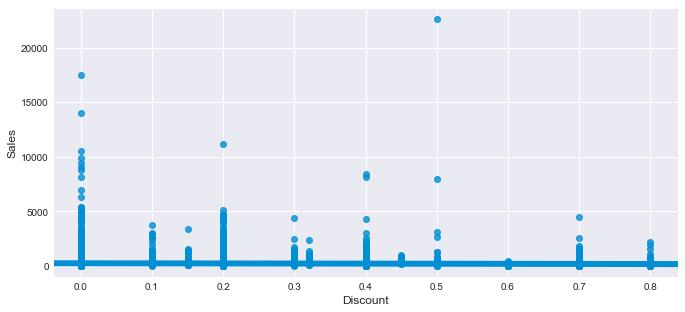

In [58]:
plt.figure(figsize=(10,5))
sns.regplot('Discount','Sales',data=store)

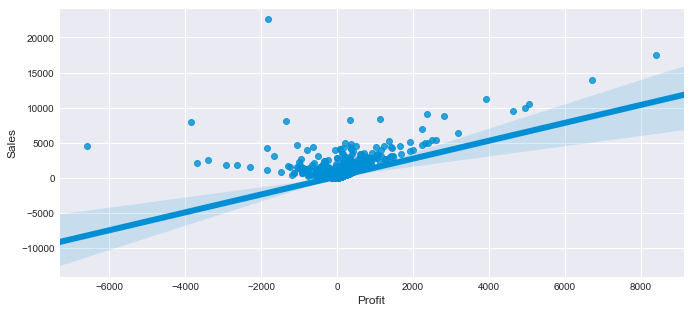

In [59]:
plt.figure(figsize=(10,5))
sns.regplot('Profit','Sales',data=store)

### i. Bar Plot
- With Categorical against numerical Features

Text(0.5, 1.0, 'Segment Wise Sales')

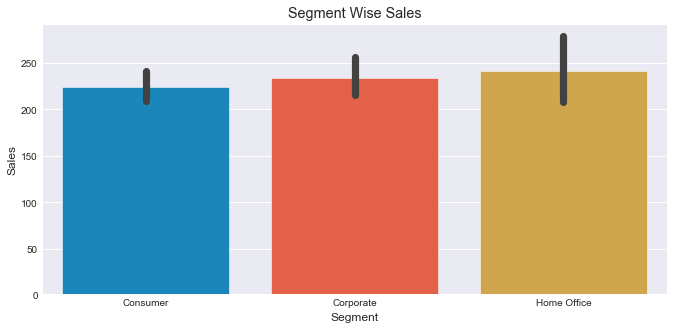

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x='Segment', y='Sales', data=store)
plt.title('Segment Wise Sales')

Text(0.5, 1.0, 'City Wise Sales')

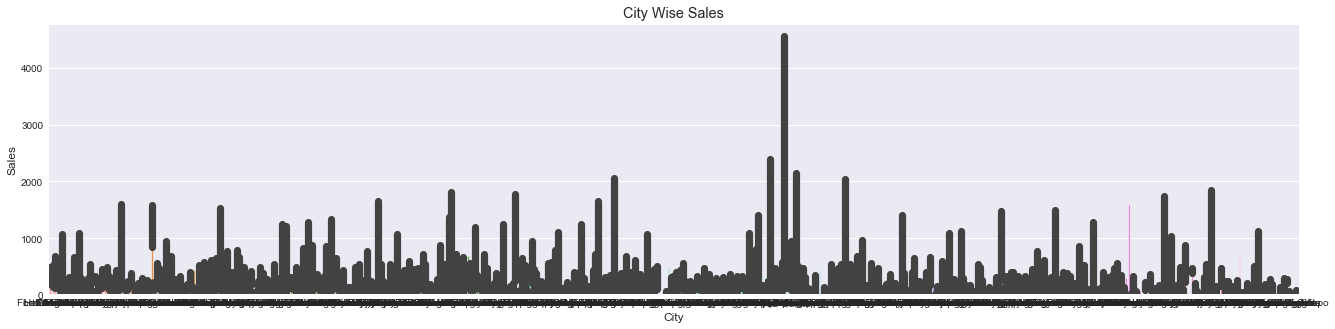

In [61]:
plt.figure(figsize=(20,5))
sns.barplot(x='City',y='Sales', data=store)
plt.title('City Wise Sales')

Text(0.5, 1.0, 'State Wise Sales')

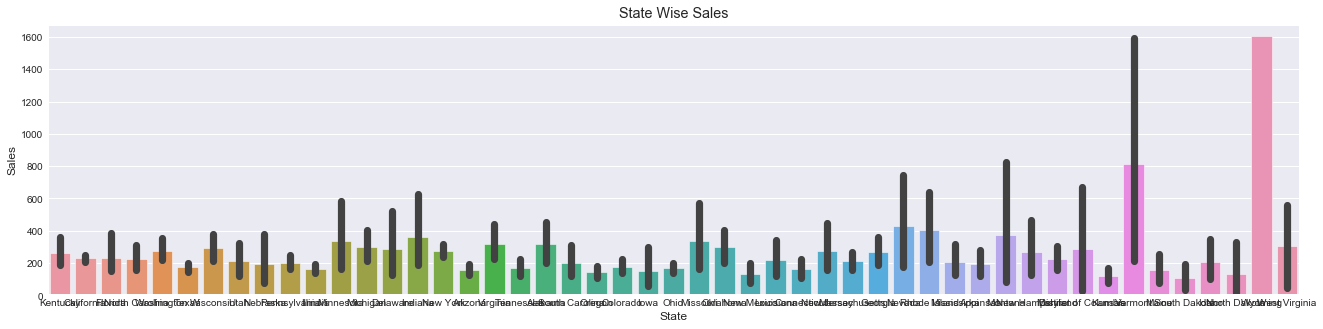

In [62]:
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Sales', data=store)
plt.title('State Wise Sales')

Text(0.5, 1.0, 'Country Wise Sales')

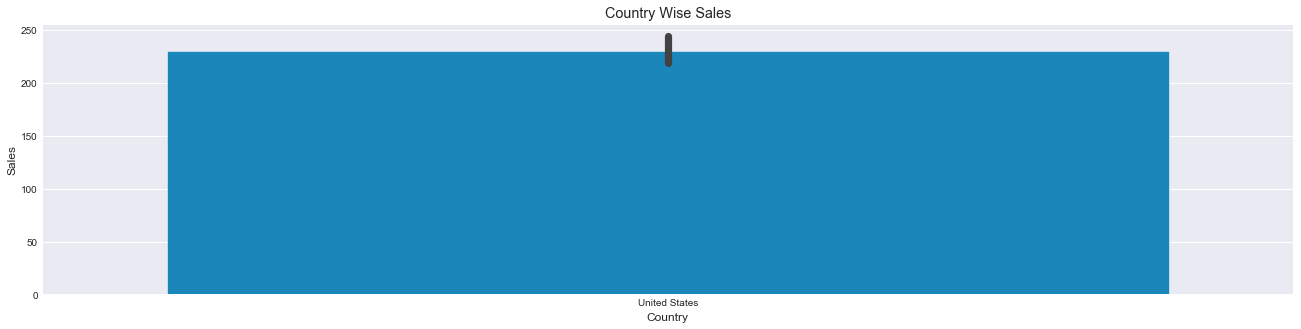

In [63]:
plt.figure(figsize=(20,5))
sns.barplot(x='Country',y='Sales', data=store)
plt.title('Country Wise Sales')

Text(0.5, 1.0, 'Region Wise Sales')

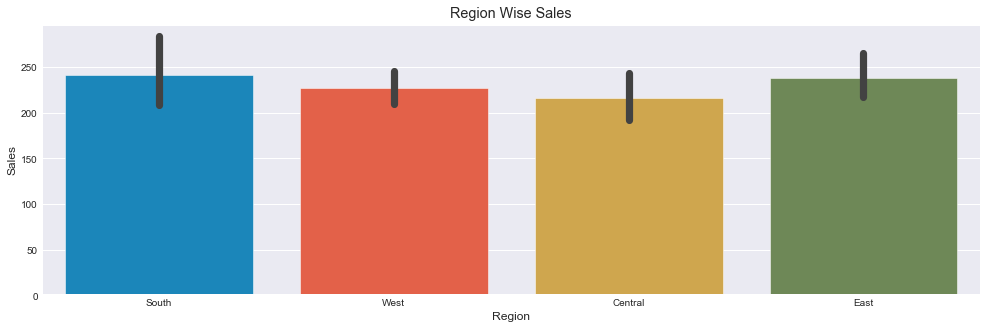

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x='Region',y='Sales', data=store)
plt.title('Region Wise Sales')

Text(0.5, 1.0, 'Category Wise Sales')

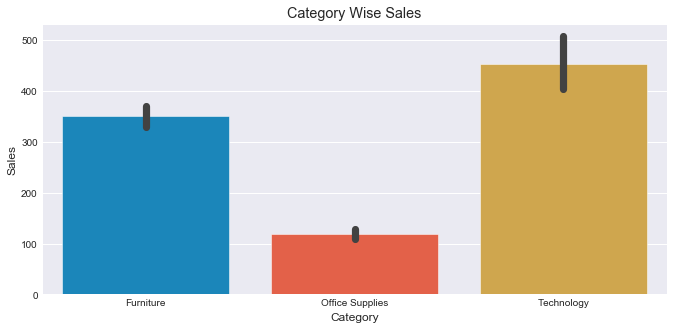

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Sales', data=store)
plt.title('Category Wise Sales')

Text(0.5, 1.0, 'Sub Category Wise Sales')

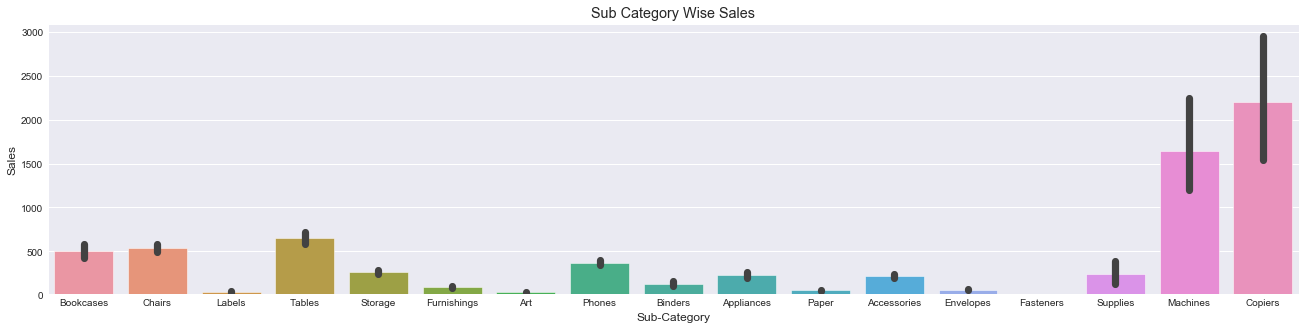

In [66]:
plt.figure(figsize=(20,5))
sns.barplot(x='Sub-Category',y='Sales', data=store)
plt.title('Sub Category Wise Sales')

In [67]:
state_data = store[['Sales', 'Profit', 'Postal Code']].groupby(['Postal Code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 0 Text yticklabel objects>)

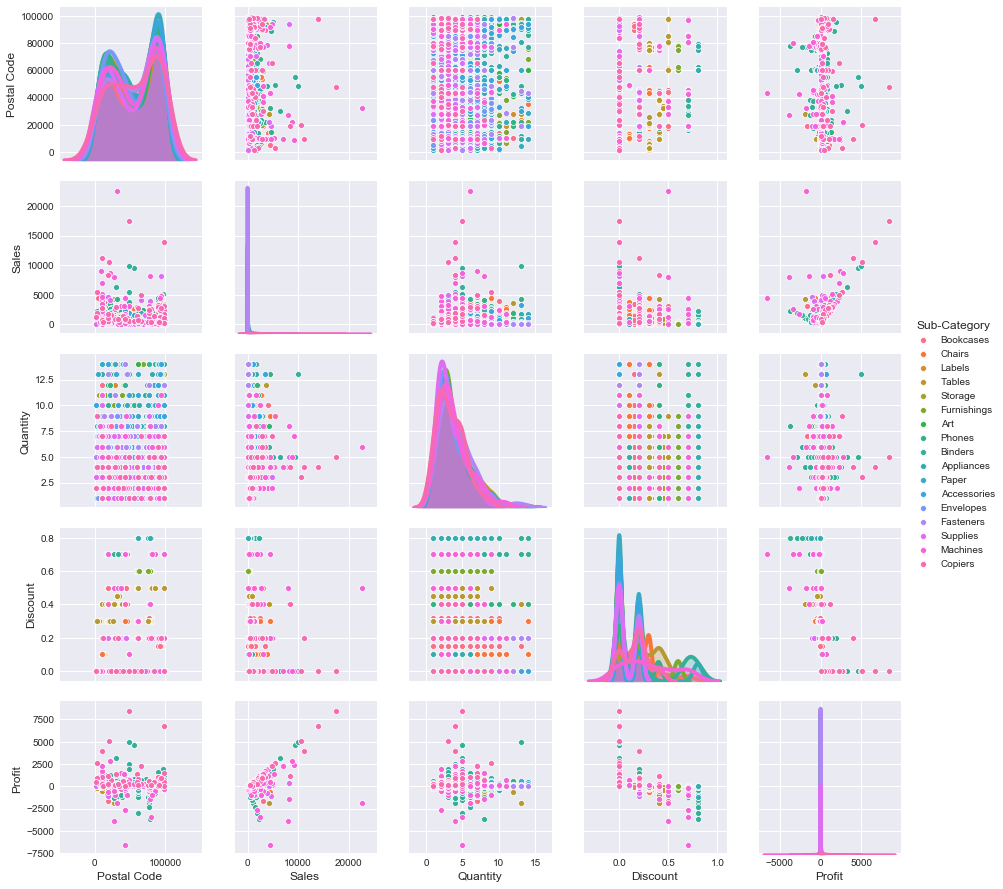

In [30]:
figsize=(15,10)
sns.pairplot(store, hue='Sub-Category')